<a href="https://colab.research.google.com/github/krittikaroy0/CSE303/blob/main/CSE303_Lab_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

Linear Regression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.


\\

Scikit-learn (Sklearn) is Python's most useful and robust machine learning package. It offers a set of fast tools for machine learning and statistical modeling, such as classification, regression, clustering, and dimensionality reduction, via a Python interface. This mostly Python-written package is based on NumPy, SciPy, and Matplotlib. 

\\

What is SKlearn Linear Regression?

Scikit-learn is a Python package that makes it easier to apply a variety of Machine Learning (ML) algorithms for predictive data analysis, such as linear regression.

Linear regression is defined as the process of determining the straight line that best fits a set of dispersed data points:

The line can then be projected to forecast fresh data points. Because of its simplicity and essential features, linear regression is a fundamental Machine Learning method.

\

Learn More:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# -*- coding: utf-8 -*-
"""
@author: Mukto
"""

# Importing the Dataset

#%%
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('Dataset_Lab_08.csv')

X = dataset[['Temp']]
y = dataset[['Yield']]

print(X)
print(y)

    Temp
0     50
1     50
2     50
3     70
4     70
5     70
6     80
7     80
8     80
9     90
10    90
11    90
12   100
13   100
14   100
    Yield
0     3.3
1     2.8
2     2.9
3     2.3
4     2.6
5     2.1
6     2.5
7     2.9
8     2.4
9     3.0
10    3.1
11    2.8
12    3.3
13    3.5
14    3.0


In [ ]:
#%%

# Splitting into Train and Test Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size
= 1/3, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

    Temp
4     70
2     50
13   100
10    90
7     80
11    90
3     70
0     50
5     70
12   100
    Yield
4     2.6
2     2.9
13    3.5
10    3.1
7     2.9
11    2.8
3     2.3
0     3.3
5     2.1
12    3.3
    Temp
1     50
6     80
8     80
9     90
14   100
    Yield
1     2.8
6     2.5
8     2.4
9     3.0
14    3.0


In [ ]:
#%%

# Fitting the dataset into Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
#%%

# Predicting the values of the Test Set

y_pred = regressor.predict(X_test)
print(y_pred)

[[2.65215947]
 [2.90531561]
 [2.90531561]
 [2.989701  ]
 [3.07408638]]


In [ ]:
#%%
 
 # Estimated coefficients and intercept for the linear regression

print(regressor.coef_)

print(regressor.intercept_)

[[0.00843854]]
[2.23023256]


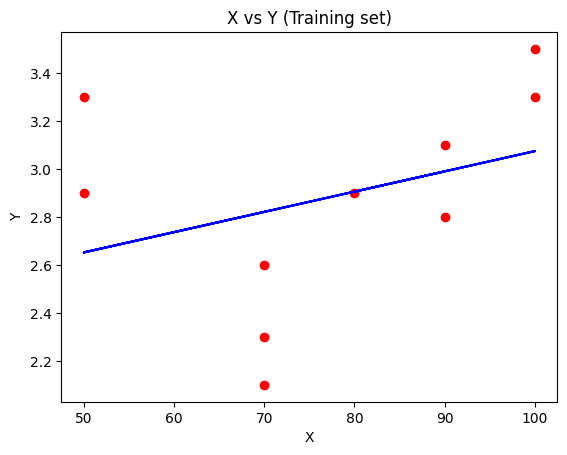

In [ ]:
#%%

# Visualizing the Correlation

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('X vs Y (Training set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Exercise 1:
Visualizing the Correlation for Test Set


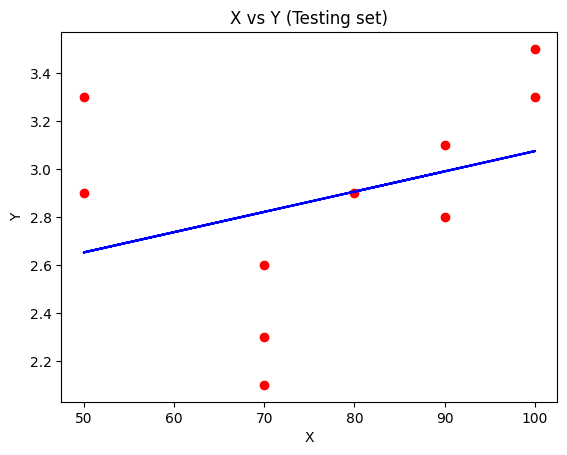

In [ ]:
# Code Here

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('X vs Y (Testing set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#%%

# Model Evaluation for Test Dataset

from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is %.2f'% mae)
print('MSE is %.2f'% mse)
print('R2 score is %.2f'% r2)

The model performance for testing set
--------------------------------------
MAE is 0.23
MSE is 0.09
R2 score is -0.43


# Exercise 2:

Now, Generate polynomial and interaction features. (degree = 2)

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

\

Learn More:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

\\

The plot graph should look like this.

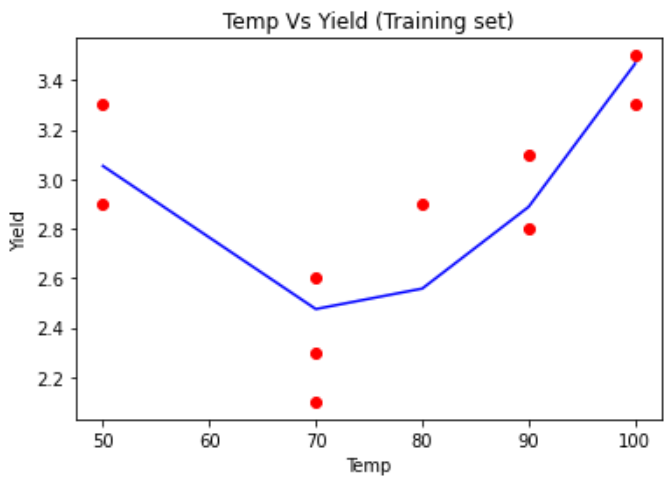

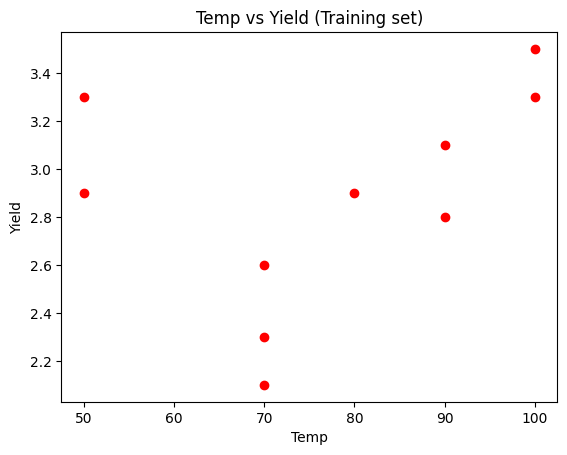

In [ ]:
# Code Here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
dataset = pd.read_csv('Dataset_Lab_08.csv')
poly = PolynomialFeatures() 
X_tr = poly.fit_transform(X_train) 
regressor.fit(X_tr,y_train) 
a = regressor.predict(poly.fit_transform(X_train)) 
li = []
b = X_train['Temp'].tolist()
for i in range(0,len(a)):
  li.append(a[i][0])
zipped = zip(b,li)
res = sorted(zipped, key = lambda x: x[0])
plt.scatter(X_train, y_train, color = 'red')
plt.plot(*zip(*res),lw=2,color='blue')
plt.title('Temp vs Yield (Training set)')
plt.xlabel('Temp')
plt.ylabel('Yield')
plt.show()